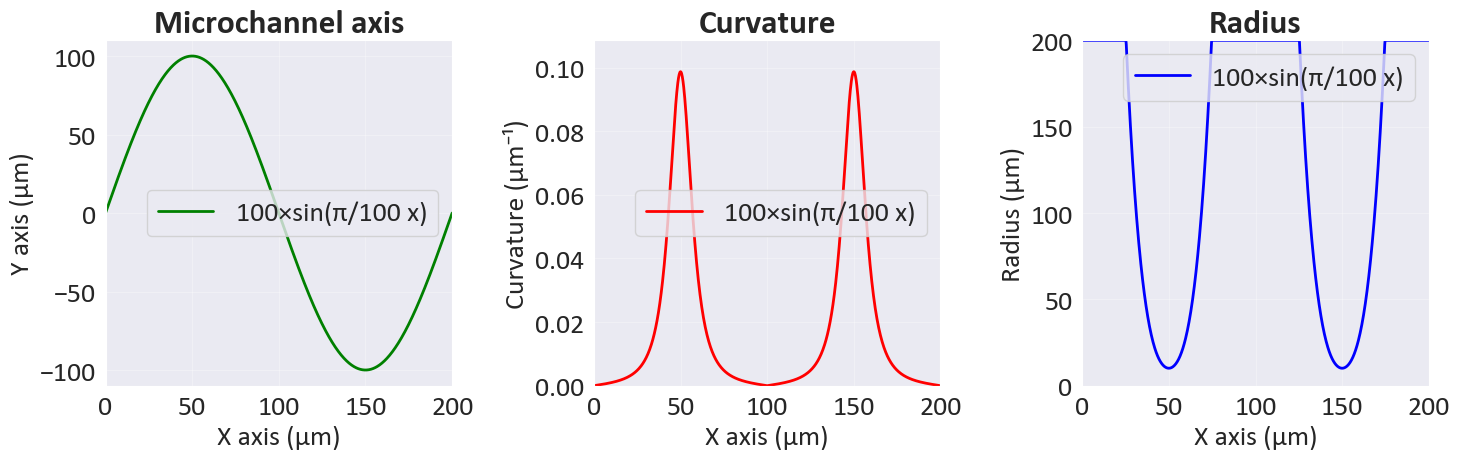

Key Point Analysis

Function: y = 100 × sin(π/100 × x)

Maximum curvature point:
  Position: x = 50.05 μm
  Curvature: κ = 0.098692 μm⁻¹
  Radius: R = 10.13 μm

Minimum curvature point:
  Position: x = 0.00 μm
  Curvature: κ = 0.000000 μm⁻¹
  Radius: R = 200.00 μm

Values at specific positions:

x = 50 μm:
  y = 100.00 μm
  Curvature κ = 0.098692 μm⁻¹
  Radius R = 10.13 μm

x = 100 μm:
  y = 0.31 μm
  Curvature κ = 0.000009 μm⁻¹
  Radius R = 200.00 μm

x = 150 μm:
  y = -100.00 μm
  Curvature κ = 0.098692 μm⁻¹
  Radius R = 10.13 μm


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Set font to Calibri
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['font.size'] = 20

# Parameters
A = 100
B = 100

# Generate x data
x = np.linspace(0, 200, 1000)

# (1) Calculate y: y = A * sin(π/B * x)
y = A * np.sin(np.pi / B * x)

# (2) Calculate curvature
y_prime = A * (np.pi / B) * np.cos(np.pi / B * x)
y_double_prime = -A * (np.pi / B)**2 * np.sin(np.pi / B * x)
curvature = np.abs(y_double_prime) / (1 + y_prime**2)**(3/2)

# (3) Calculate radius of curvature
radius = 1 / (curvature + 1e-10)
radius = np.clip(radius, 0, 200)

# Create figure
fig = plt.figure(figsize=(15, 5))
gs = GridSpec(1, 3, figure=fig)

# Plot 1: Original function
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(x, y, 'g-', linewidth=2, label=f'{A}×sin(π/{B} x)')
ax1.set_xlabel('X axis (μm)')
ax1.set_ylabel('Y axis (μm)')
ax1.set_title('Microchannel axis', fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_xlim(0, 200)

# Plot 2: Curvature
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(x, curvature, 'r-', linewidth=2, label=f'{A}×sin(π/{B} x)')
ax2.set_xlabel('X axis (μm)')
ax2.set_ylabel('Curvature (μm⁻¹)')
ax2.set_title('Curvature', fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_xlim(0, 200)
ax2.set_ylim(0, max(curvature) * 1.1)

# Plot 3: Radius
ax3 = fig.add_subplot(gs[0, 2])
ax3.plot(x, radius, 'b-', linewidth=2, label=f'{A}×sin(π/{B} x)')
ax3.set_xlabel('X axis (μm)')
ax3.set_ylabel('Radius (μm)')
ax3.set_title('Radius', fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend()
ax3.set_xlim(0, 200)
ax3.set_ylim(0, 200)

plt.tight_layout()
plt.show()

# Print key data
print("=" * 60)
print("Key Point Analysis")
print("=" * 60)
print(f"\nFunction: y = {A} × sin(π/{B} × x)\n")

max_curv_idx = np.argmax(curvature)
min_curv_idx = np.argmin(curvature)

print(f"Maximum curvature point:")
print(f"  Position: x = {x[max_curv_idx]:.2f} μm")
print(f"  Curvature: κ = {curvature[max_curv_idx]:.6f} μm⁻¹")
print(f"  Radius: R = {radius[max_curv_idx]:.2f} μm")

print(f"\nMinimum curvature point:")
print(f"  Position: x = {x[min_curv_idx]:.2f} μm")
print(f"  Curvature: κ = {curvature[min_curv_idx]:.6f} μm⁻¹")
print(f"  Radius: R = {radius[min_curv_idx]:.2f} μm")

print(f"\nValues at specific positions:")
for x_point in [50, 100, 150]:
    idx = np.argmin(np.abs(x - x_point))
    print(f"\nx = {x_point} μm:")
    print(f"  y = {y[idx]:.2f} μm")
    print(f"  Curvature κ = {curvature[idx]:.6f} μm⁻¹")
    print(f"  Radius R = {radius[idx]:.2f} μm")
